<a href="https://colab.research.google.com/github/Kdavis2025/Projects/blob/main/DOGE_Cleaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import statsmodels.api as sm


In [ ]:
# load content/contracts.csv low memory
df = pd.read_csv('/content/contracts.csv', low_memory=False)

# load combined_filtered_contract.csv
df2 = pd.read_csv('/content/combined_filtered_contracts.csv')

df.head(10), df2.head(10)

/tmp/ipython-input-4-60256372.py:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/combined_filtered_contracts.csv')


(             piid                                   agency  \
 0  2032H824F00058                   Department of Treasury   
 1  20341522F00039                   Department of Treasury   
 2  75D30124F19709  Department of Health and Human Services   
 3     Unavailable                                    USAID   
 4   95170024C0273    United States Agency for Global Media   
 5     Unavailable                                    USAID   
 6  75D30120C09934  Department of Health and Human Services   
 7  75D30120F09636  Department of Health and Human Services   
 8  75D30122C15665  Department of Health and Human Services   
 9  75D30124C20336  Department of Health and Human Services   
 
                                               vendor         value  \
 0                            DELOITTE CONSULTING LLP  7.259739e+06   
 1                                FI CONSULTING, INC.  2.992678e+06   
 2                        FAMILY HEALTH INTERNATIONAL  1.428250e+08   
 3                   

In [ ]:
#Show all rows
pd.set_option('display.max_rows', None)
df2.head(15).transpose().reset_index()

,index,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,award_id_piid,47QSWA20D0092,47QRAA24D006P,47QTCA20D008C,47QTCA23D0009,GS33F004DA,47QTCA19D0063,GS03F060AA,47QTCA23D00EN,47QRAA24D00CT,47QSWA22D0036,47QTCA20D002V,47QRAA21D0066,GS35F0406T,GS35F438AA,47QRAA19D0003
1,total_dollars_obligated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,potential_total_value_of_award,500000.0,500000.0,4000000.0,7600000.0,450000.0,6000000.0,708183.0,500000.0,2000000.0,500000.0,2000000.0,21000000.0,4374577.0,475000.0,5000000.0
3,period_of_performance_start_date,2020-08-15,2024-04-17,2020-04-01,2022-10-07,2015-11-03,2019-02-19,2013-04-01,2023-09-26,2024-08-22,2022-02-11,2019-12-03,2021-05-27,2007-04-26,2013-06-27,2018-10-12
4,ordering_period_end_date,2025-08-14,2029-04-16,2030-03-31,2027-10-06,2025-11-02,2029-02-18,2028-03-31,2028-09-25,2029-08-21,2027-02-10,2029-12-02,2026-05-26,2027-04-25,2028-06-26,2028-10-11
5,awarding_agency_name,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration
6,awarding_sub_agency_name,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service
7,funding_agency_name,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration
8,funding_sub_agency_name,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service
9,foreign_funding,X,X,X,X,X,X,X,X,X,X,X,X,X,X,X


In [ ]:
# 2. Merge on award_id_piid (contracts) and piid (DOGE)
df_merged = df2.merge(
    df,
    left_on='award_id_piid',
    right_on='piid',
    how='left'   # or 'left' to keep all contracts
)

df_merged.head(40)

,award_id_piid,total_dollars_obligated,potential_total_value_of_award,period_of_performance_start_date,ordering_period_end_date,awarding_agency_name,awarding_sub_agency_name,funding_agency_name,funding_sub_agency_name,foreign_funding,...,last_modified_date,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings
0,47QSWA20D0092,0.0,500000.0,2020-08-15,2025-08-14,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47QRAA24D006P,0.0,500000.0,2024-04-17,2029-04-16,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,47QTCA20D008C,0.0,4000000.0,2020-04-01,2030-03-31,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,47QTCA23D0009,0.0,7600000.0,2022-10-07,2027-10-06,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,GS33F004DA,0.0,450000.0,2015-11-03,2025-11-02,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,47QTCA19D0063,0.0,6000000.0,2019-02-19,2029-02-18,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,GS03F060AA,0.0,708183.0,2013-04-01,2028-03-31,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,47QTCA23D00EN,0.0,500000.0,2023-09-26,2028-09-25,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,47QRAA24D00CT,0.0,2000000.0,2024-08-22,2029-08-21,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,47QSWA22D0036,0.0,500000.0,2022-02-11,2027-02-10,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 3. Clean the merged data
#    - Fill NaN values with 'Unspecified'
#    - Replace 't'/'f' strings with 1/0
df_cleaned = df_merged.fillna('Unspecified').replace({'t': 1, 'f': 0})
df_cleaned.head(10)

/tmp/ipython-input-7-3187155512.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned = df_merged.fillna('Unspecified').replace({'t': 1, 'f': 0})


,award_id_piid,total_dollars_obligated,potential_total_value_of_award,period_of_performance_start_date,ordering_period_end_date,awarding_agency_name,awarding_sub_agency_name,funding_agency_name,funding_sub_agency_name,foreign_funding,...,last_modified_date,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings
0,47QSWA20D0092,0.0,500000.0,2020-08-15,2025-08-14,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
1,47QRAA24D006P,0.0,500000.0,2024-04-17,2029-04-16,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
2,47QTCA20D008C,0.0,4000000.0,2020-04-01,2030-03-31,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
3,47QTCA23D0009,0.0,7600000.0,2022-10-07,2027-10-06,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
4,GS33F004DA,0.0,450000.0,2015-11-03,2025-11-02,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
5,47QTCA19D0063,0.0,6000000.0,2019-02-19,2029-02-18,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
6,GS03F060AA,0.0,708183.0,2013-04-01,2028-03-31,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
7,47QTCA23D00EN,0.0,500000.0,2023-09-26,2028-09-25,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
8,47QRAA24D00CT,0.0,2000000.0,2024-08-22,2029-08-21,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified
9,47QSWA22D0036,0.0,500000.0,2022-02-11,2027-02-10,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,2025-05-03,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified


In [ ]:
df_cleaned.head(3000).transpose().reset_index()

,index,0,1,2,3,4,5,6,7,8,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,award_id_piid,47QSWA20D0092,47QRAA24D006P,47QTCA20D008C,47QTCA23D0009,GS33F004DA,47QTCA19D0063,GS03F060AA,47QTCA23D00EN,47QRAA24D00CT,...,36C25224F0211,24322625F0064,12314423C0070,89303325CEM000135,GS30F014AA,36C25723P0399,47QTCA18D005G,47PB0025F0216,36C24524N0478,47QSMS25D000J
1,total_dollars_obligated,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,204907.29,45302.5,3009937.87,1528531.89,0.0,190408.56,0.0,30716.22,9426.1,0.0
2,potential_total_value_of_award,500000.0,500000.0,4000000.0,7600000.0,450000.0,6000000.0,708183.0,500000.0,2000000.0,...,204907.29,45302.5,6064361.35,44328361.28,4000000.0,476745.56,78549778.0,30716.22,500000.0,7000000.0
3,period_of_performance_start_date,2020-08-15,2024-04-17,2020-04-01,2022-10-07,2015-11-03,2019-02-19,2013-04-01,2023-09-26,2024-08-22,...,2024-08-09,2025-05-02,2023-09-20,2025-04-01,2013-02-27,2023-06-13,2018-01-22,2024-12-01,2024-04-10,2024-10-14
4,ordering_period_end_date,2025-08-14,2029-04-16,2030-03-31,2027-10-06,2025-11-02,2029-02-18,2028-03-31,2028-09-25,2029-08-21,...,Unspecified,Unspecified,Unspecified,Unspecified,2028-02-26,Unspecified,2028-01-21,Unspecified,Unspecified,2029-10-13
5,awarding_agency_name,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,...,Department of Veterans Affairs,Office of Personnel Management,Department of Agriculture,Department of Energy,General Services Administration,Department of Veterans Affairs,General Services Administration,General Services Administration,Department of Veterans Affairs,General Services Administration
6,awarding_sub_agency_name,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,...,Department of Veterans Affairs,Office of Personnel Management,Office of the Chief Financial Officer,Department of Energy,Federal Acquisition Service,Department of Veterans Affairs,Federal Acquisition Service,Public Buildings Service,Department of Veterans Affairs,Federal Acquisition Service
7,funding_agency_name,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,General Services Administration,...,Department of Veterans Affairs,Office of Personnel Management,Department of Agriculture,Department of Energy,General Services Administration,Department of Veterans Affairs,General Services Administration,General Services Administration,Department of Veterans Affairs,General Services Administration
8,funding_sub_agency_name,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,Federal Acquisition Service,...,Department of Veterans Affairs,Office of Personnel Management,Office of the Chief Information Officer,Department of Energy,Federal Acquisition Service,Department of Veterans Affairs,Federal Acquisition Service,Public Buildings Service,Department of Veterans Affairs,Federal Acquisition Service
9,foreign_funding,X,X,X,X,X,X,X,X,X,...,X,X,X,X,X,X,X,X,X,X


In [ ]:
# DOGE fpds_status
df_cleaned['fpds_status'].value_counts()

,count
fpds_status,
Unspecified,135306
TERMINATED,2234
OTHER ADMINISTRATIVE ACTION,80
Expired,71
EXERCISE AN OPTION,42
SUPPLEMENTAL AGREEMENT FOR WORK WITHIN SCOPE,40
FUNDING ONLY ACTION,32
BASE AWARD,10
TRANSFER ACTION,10


In [ ]:
# Add DOGE Flag Column if statement where piid has 'unspecified' in it 1 if not 0
df_cleaned['DOGE_Flag'] = df_cleaned['piid'].apply(lambda x: 0 if 'unspecified' in x.lower() else 1)
df_cleaned.head(10)

#Remove doge_flag column

#df_cleaned = df_cleaned.drop(columns=['doge_flag'])
#df_cleaned.head(10)

,award_id_piid,total_dollars_obligated,potential_total_value_of_award,period_of_performance_start_date,ordering_period_end_date,awarding_agency_name,awarding_sub_agency_name,funding_agency_name,funding_sub_agency_name,foreign_funding,...,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings,DOGE_Flag
0,47QSWA20D0092,0.0,500000.0,2020-08-15,2025-08-14,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
1,47QRAA24D006P,0.0,500000.0,2024-04-17,2029-04-16,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
2,47QTCA20D008C,0.0,4000000.0,2020-04-01,2030-03-31,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
3,47QTCA23D0009,0.0,7600000.0,2022-10-07,2027-10-06,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
4,GS33F004DA,0.0,450000.0,2015-11-03,2025-11-02,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
5,47QTCA19D0063,0.0,6000000.0,2019-02-19,2029-02-18,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
6,GS03F060AA,0.0,708183.0,2013-04-01,2028-03-31,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
7,47QTCA23D00EN,0.0,500000.0,2023-09-26,2028-09-25,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
8,47QRAA24D00CT,0.0,2000000.0,2024-08-22,2029-08-21,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
9,47QSWA22D0036,0.0,500000.0,2022-02-11,2027-02-10,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0


In [ ]:
# ┌────────────────────────────────────────────────────────────────────┐
# │ 1. — Distribution of Data                                         │
# └────────────────────────────────────────────────────────────────────┘
# numeric columns only
num_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()

# summary stats
print("Numeric summary statistics:")
display(df_cleaned[num_cols].describe().T)

# for categorical variables
cat_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()
print("\nTop value counts for key categoricals:")
for col in cat_cols:
    print(f"\n{col}:")
    display(df_cleaned[col].value_counts().head(5))

Numeric summary statistics:


,count,mean,std,min,25%,50%,75%,max
total_dollars_obligated,137833.0,1.249588e+07,4.728139e+08,-3135259.34,44.73,379.80,28412.38,3.845325e+10
potential_total_value_of_award,137833.0,1.318069e+10,1.151754e+11,0.00,126.45,2036.68,336994.18,2.840238e+12
small_business_competitiveness_demonstration_program,137833.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.000000e+00
DOGE_Flag,137833.0,1.833378e-02,1.341558e-01,0.00,0.00,0.00,0.00,1.000000e+00



Top value counts for key categoricals:

award_id_piid:


,count
award_id_piid,
75N92025F00001,45
75N98024F00001,36
75N95023F00001,35
75FCMC21F0001,34
75D30123F00001,24



period_of_performance_start_date:


,count
period_of_performance_start_date,
2025-05-01,8669
2025-04-18,6784
2025-04-30,6399
2025-04-24,6249
2025-04-15,6148



ordering_period_end_date:


,count
ordering_period_end_date,
Unspecified,118255
2029-12-18,532
2026-04-29,484
2030-04-14,369
2029-09-29,347



awarding_agency_name:


,count
awarding_agency_name,
General Services Administration,94593
Department of Veterans Affairs,6487
Department of Justice,6147
Department of Health and Human Services,5204
Department of the Treasury,4067



awarding_sub_agency_name:


,count
awarding_sub_agency_name,
Federal Acquisition Service,92500
Department of Veterans Affairs,6487
Federal Prison System / Bureau of Prisons,3120
Internal Revenue Service,2938
Department of State,2334



funding_agency_name:


,count
funding_agency_name,
General Services Administration,93205
Department of Veterans Affairs,6511
Department of Justice,6070
Department of Health and Human Services,5304
Department of the Treasury,3941



funding_sub_agency_name:


,count
funding_sub_agency_name,
Federal Acquisition Service,91515
Department of Veterans Affairs,6510
Federal Prison System / Bureau of Prisons,3121
Internal Revenue Service,2770
Department of State,2321



foreign_funding:


,count
foreign_funding,
X,137298
A,469
B,66



recipient_name:


,count
recipient_name,
"W.W. GRAINGER, INC.",14838
NATIONAL INDUSTRIES FOR THE BLIND,14731
"WRIGHT TOOL COMPANY, LLC",4398
MONO MACHINES LLC,3477
LC INDUSTRIES INC,2939



cage_code:


,count
cage_code,
25795,14838
5M888,14731
14846,4398
4VRV3,3477
1A920,2939



recipient_country_name:


,count
recipient_country_name,
UNITED STATES,136606
CANADA,250
JAPAN,155
UNITED KINGDOM,106
GERMANY,55



recipient_address_line_1:


,count
recipient_address_line_1,
"100, GRAINGER PARKWAY",14797
3000 POTOMAC AVE,14731
24680 MOUND RD,4398
4500 EMPEROR BLVD,2939
"1 MARINA PARK DRIVE, SUITE 220",2870



recipient_city_name:


,count
recipient_city_name,
ALEXANDRIA,15615
LAKE FOREST,14862
WARREN,5136
WASHINGTON,3248
BOSTON,3092



recipient_county_name:


,count
recipient_county_name,
ALEXANDRIA (CITY),15276
LAKE,15207
FAIRFAX,6702
MACOMB,5169
SUFFOLK,3546



prime_award_transaction_recipient_state_fips_code:


,count
prime_award_transaction_recipient_state_fips_code,
51.0,27013
17.0,18997
6.0,8662
26.0,7758
37.0,7151



recipient_state_code:


,count
recipient_state_code,
VA,27013
IL,18997
CA,8662
MI,7758
NC,7151



recipient_state_name:


,count
recipient_state_name,
VIRGINIA,27013
ILLINOIS,18997
CALIFORNIA,8662
MICHIGAN,7758
NORTH CAROLINA,7151



recipient_zip_4_code:


,count
recipient_zip_4_code,
600455202,14838
223053084,14731
480912036,4398
277038420,2939
022101873,2870



recipient_phone_number:


,count
recipient_phone_number,
8475596349.0,7544
7033100330.0,7176
7033100330,4529
8475596349,4337
7033100330.0,3026



naics_code:


,count
naics_code,
444110.0,14961
423850.0,8373
339940.0,6519
453210.0,6021
332216.0,5298



naics_description:


,count
naics_description,
HOME CENTERS,14961
SERVICE ESTABLISHMENT EQUIPMENT AND SUPPLIES MERCHANT WHOLESALERS,8373
OFFICE SUPPLIES (EXCEPT PAPER) MANUFACTURING,6519
OFFICE SUPPLIES AND STATIONERY STORES,6021
SAW BLADE AND HANDTOOL MANUFACTURING,5298



labor_standards:


,count
labor_standards,
NOT APPLICABLE,102916
NO,19499
YES,15418



construction_wage_rate_requirements:


,count
construction_wage_rate_requirements,
NOT APPLICABLE,121294
NO,14036
YES,2499
Unspecified,4



interagency_contracting_authority:


,count
interagency_contracting_authority,
NOT APPLICABLE,135724
OTHER STATUTORY AUTHORITY,1788
ECONOMY ACT,320
Unspecified,1



cost_accounting_standards_clause:


,count
cost_accounting_standards_clause,
NOT APPLICABLE EXEMPT FROM CAS,110009
Unspecified,25802
YES - CAS CLAUSE INCLUDED,1257
NO - CAS WAIVER APPROVED,765



performance_based_service_acquisition:


,count
performance_based_service_acquisition,
NOT APPLICABLE,89123
NO - SERVICE WHERE PBA IS NOT USED.,31469
YES - SERVICE WHERE PBA IS USED.,17240
Unspecified,1



multi_year_contract_code:


,count
multi_year_contract_code,
Unspecified,88361
N,41014
Y,8458



contingency_humanitarian_or_peacekeeping_operation:


,count
contingency_humanitarian_or_peacekeeping_operation,
NOT APPLICABLE,124930
Unspecified,12660
"PRESIDENTIAL ISSUED EMERGENCY DECLARATION, OR A MAJOR DISASTER DECLARATION",203
HUMANITARIAN OR PEACEKEEPING OPERATION AS DEFINED IN 10 U.S.C. 2302(8),27
CONTINGENCY OPERATION AS DEFINED IN 10 U.S.C. 101(A)(13),13



alaskan_native_corporation_owned_firm:


,count
alaskan_native_corporation_owned_firm,
0,136812
1,1020
Unspecified,1



american_indian_owned_business:


,count
american_indian_owned_business,
0,135935
1,1897
Unspecified,1



indian_tribe_federally_recognized:


,count
indian_tribe_federally_recognized,
0,137417
1,415
Unspecified,1



native_hawaiian_organization_owned_firm:


,count
native_hawaiian_organization_owned_firm,
0,137732
1,100
Unspecified,1



tribally_owned_firm:


,count
tribally_owned_firm,
0,137078
1,754
Unspecified,1



veteran_owned_business:


,count
veteran_owned_business,
0,127005
1,10827
Unspecified,1



service_disabled_veteran_owned_business:


,count
service_disabled_veteran_owned_business,
0,129313
1,8519
Unspecified,1



woman_owned_business:


,count
woman_owned_business,
0,121015
1,16817
Unspecified,1



women_owned_small_business:


,count
women_owned_small_business,
0,123131
1,14701
Unspecified,1



economically_disadvantaged_women_owned_small_business:


,count
economically_disadvantaged_women_owned_small_business,
0,132564
1,5268
Unspecified,1



joint_venture_women_owned_small_business:


,count
joint_venture_women_owned_small_business,
0,137362
1,470
Unspecified,1



joint_venture_economic_disadvantaged_women_owned_small_bus:


,count
joint_venture_economic_disadvantaged_women_owned_small_bus,
0,137470
1,362
Unspecified,1



minority_owned_business:


,count
minority_owned_business,
0,118582
1,19250
Unspecified,1



subcontinent_asian_asian_indian_american_owned_business:


,count
subcontinent_asian_asian_indian_american_owned_business,
0,134672
1,3160
Unspecified,1



asian_pacific_american_owned_business:


,count
asian_pacific_american_owned_business,
0,133492
1,4340
Unspecified,1



black_american_owned_business:


,count
black_american_owned_business,
0,133396
1,4436
Unspecified,1



hispanic_american_owned_business:


,count
hispanic_american_owned_business,
0,131589
1,6243
Unspecified,1



native_american_owned_business:


,count
native_american_owned_business,
0,134602
1,3230
Unspecified,1



other_minority_owned_business:


,count
other_minority_owned_business,
0,136925
1,907
Unspecified,1



contracting_officers_determination_of_business_size:


,count
contracting_officers_determination_of_business_size,
SMALL BUSINESS,71840
OTHER THAN SMALL BUSINESS,65991
Unspecified,2



contracting_officers_determination_of_business_size_code:


,count
contracting_officers_determination_of_business_size_code,
S,71840
O,65991
Unspecified,2



emerging_small_business:


,count
emerging_small_business,
0,137811
1,21
Unspecified,1



community_developed_corporation_owned_firm:


,count
community_developed_corporation_owned_firm,
0,137740
1,92
Unspecified,1



labor_surplus_area_firm:


,count
labor_surplus_area_firm,
0,137814
1,18
Unspecified,1



us_federal_government:


,count
us_federal_government,
0,137072
1,760
Unspecified,1



federally_funded_research_and_development_corp:


,count
federally_funded_research_and_development_corp,
0,137832
Unspecified,1



federal_agency:


,count
federal_agency,
0,137073
1,759
Unspecified,1



us_state_government:


,count
us_state_government,
0,137261
1,571
Unspecified,1



us_local_government:


,count
us_local_government,
0,137573
1,259
Unspecified,1



city_local_government:


,count
city_local_government,
0,137759
1,73
Unspecified,1



county_local_government:


,count
county_local_government,
0,137732
1,100
Unspecified,1



inter_municipal_local_government:


,count
inter_municipal_local_government,
0,137812
1,20
Unspecified,1



local_government_owned:


,count
local_government_owned,
0,137792
1,40
Unspecified,1



municipality_local_government:


,count
municipality_local_government,
0,137774
1,58
Unspecified,1



school_district_local_government:


,count
school_district_local_government,
0,137823
1,9
Unspecified,1



township_local_government:


,count
township_local_government,
0,137828
1,4
Unspecified,1



us_tribal_government:


,count
us_tribal_government,
0,137773
1,59
Unspecified,1



foreign_government:


,count
foreign_government,
0,137827
1,5
Unspecified,1



organizational_type:


,count
organizational_type,
CORPORATE NOT TAX EXEMPT,89412
CORPORATE TAX EXEMPT,21662
PARTNERSHIP,13245
OTHER,6836
SOLE PROPRIETORSHIP,2711



corporate_entity_not_tax_exempt:


,count
corporate_entity_not_tax_exempt,
1,89394
0,48438
Unspecified,1



corporate_entity_tax_exempt:


,count
corporate_entity_tax_exempt,
0,116170
1,21662
Unspecified,1



partnership_or_limited_liability_partnership:


,count
partnership_or_limited_liability_partnership,
0,124594
1,13238
Unspecified,1



sole_proprietorship:


,count
sole_proprietorship,
0,135116
1,2716
Unspecified,1



small_agricultural_cooperative:


,count
small_agricultural_cooperative,
0,137778
1,54
Unspecified,1



international_organization:


,count
international_organization,
0,137551
1,281
Unspecified,1



us_government_entity:


,count
us_government_entity,
0,136268
1,1564
Unspecified,1



community_development_corporation:


,count
community_development_corporation,
0,137779
1,53
Unspecified,1



domestic_shelter:


,count
domestic_shelter,
0,137812
1,20
Unspecified,1



educational_institution:


,count
educational_institution,
0,136982
1,850
Unspecified,1



foundation:


,count
foundation,
0,137773
1,59
Unspecified,1



hospital_flag:


,count
hospital_flag,
0,137658
1,174
Unspecified,1



manufacturer_of_goods:


,count
manufacturer_of_goods,
0,110542
1,27290
Unspecified,1



veterinary_hospital:


,count
veterinary_hospital,
0,137819
1,13
Unspecified,1



hispanic_servicing_institution:


,count
hispanic_servicing_institution,
0,137803
1,29
Unspecified,1



receives_contracts:


,count
receives_contracts,
0,129619
1,8213
Unspecified,1



receives_financial_assistance:


,count
receives_financial_assistance,
0,137825
1,7
Unspecified,1



receives_contracts_and_financial_assistance:


,count
receives_contracts_and_financial_assistance,
1,127188
0,10644
Unspecified,1



airport_authority:


,count
airport_authority,
0,137817
1,15
Unspecified,1



council_of_governments:


,count
council_of_governments,
0,137789
1,43
Unspecified,1



housing_authorities_public_tribal:


,count
housing_authorities_public_tribal,
0,137802
1,30
Unspecified,1



interstate_entity:


,count
interstate_entity,
0,137823
1,9
Unspecified,1



planning_commission:


,count
planning_commission,
0,137814
1,18
Unspecified,1



port_authority:


,count
port_authority,
0,137815
1,17
Unspecified,1



transit_authority:


,count
transit_authority,
0,137765
1,67
Unspecified,1



subchapter_scorporation:


,count
subchapter_scorporation,
0,117641
1,20191
Unspecified,1



limited_liability_corporation:


,count
limited_liability_corporation,
0,113579
1,24253
Unspecified,1



foreign_owned:


,count
foreign_owned,
0,134481
1,3351
Unspecified,1



for_profit_organization:


,count
for_profit_organization,
1,112657
0,25175
Unspecified,1



nonprofit_organization:


,count
nonprofit_organization,
0,119622
1,18210
Unspecified,1



other_not_for_profit_organization:


,count
other_not_for_profit_organization,
0,134610
1,3222
Unspecified,1



the_ability_one_program:


,count
the_ability_one_program,
0,118541
1,19291
Unspecified,1



private_university_or_college:


,count
private_university_or_college,
0,137525
1,307
Unspecified,1



state_controlled_institution_of_higher_learning:


,count
state_controlled_institution_of_higher_learning,
0,137398
1,434
Unspecified,1



1862_land_grant_college:


,count
1862_land_grant_college,
0,137647
1,185
Unspecified,1



1890_land_grant_college:


,count
1890_land_grant_college,
0,137815
1,17
Unspecified,1



1994_land_grant_college:


,count
1994_land_grant_college,
0,137831
1,1
Unspecified,1



minority_institution:


,count
minority_institution,
0,137802
1,30
Unspecified,1



historically_black_college:


,count
historically_black_college,
0,137823
1,9
Unspecified,1



tribal_college:


,count
tribal_college,
0,137830
1,2
Unspecified,1



alaskan_native_servicing_institution:


,count
alaskan_native_servicing_institution,
0,137832
Unspecified,1



native_hawaiian_servicing_institution:


,count
native_hawaiian_servicing_institution,
0,137827
1,5
Unspecified,1



school_of_forestry:


,count
school_of_forestry,
0,137803
1,29
Unspecified,1



veterinary_college:


,count
veterinary_college,
0,137769
1,63
Unspecified,1



dot_certified_disadvantage:


,count
dot_certified_disadvantage,
0,131675
1,6157
Unspecified,1



self_certified_small_disadvantaged_business:


,count
self_certified_small_disadvantaged_business,
0,115991
1,21841
Unspecified,1



small_disadvantaged_business:


,count
small_disadvantaged_business,
0,137182
1,650
Unspecified,1



c8a_program_participant:


,count
c8a_program_participant,
0,131063
1,6769
Unspecified,1



historically_underutilized_business_zone_hubzone_firm:


,count
historically_underutilized_business_zone_hubzone_firm,
0,134111
1,3721
Unspecified,1



sba_certified_8a_joint_venture:


,count
sba_certified_8a_joint_venture,
0,137395
1,437
Unspecified,1



highly_compensated_officer_1_name:


,count
highly_compensated_officer_1_name,
Unspecified,115980
BRIAN MCNANNEY,4398
ROBERT MASSON,2917
WALTER MILLER,1763
SAVANNAH KERNC,1457



highly_compensated_officer_1_amount:


,count
highly_compensated_officer_1_amount,
Unspecified,115980
402289.0,4398
662099.0,2917
276707.0,1763
159862.0,1457



highly_compensated_officer_2_name:


,count
highly_compensated_officer_2_name,
Unspecified,116470
DEREK BRUSS,4398
JAY BASNIGHT,2917
DAVID MILLER,1763
JULIE BEST,1457



highly_compensated_officer_2_amount:


,count
highly_compensated_officer_2_amount,
Unspecified,116470
184189.0,4398
540230.0,2902
156904.0,1763
130000.0,1500



highly_compensated_officer_3_name:


,count
highly_compensated_officer_3_name,
Unspecified,119549
JEFFREY PRIMEAU,4398
PAMELA DASKALAKIS,2902
WILLIAM MAHANEY,1457
BRYAN DAVIS,1117



highly_compensated_officer_3_amount:


,count
highly_compensated_officer_3_amount,
Unspecified,119549
100795.0,4398
510230.0,2902
113544.0,1457
241287.0,1117



highly_compensated_officer_4_name:


,count
highly_compensated_officer_4_name,
Unspecified,119037
PATRICK TREVISAN,4398
ROBERT LEDENKO,2917
AMANDA HERBERT,1457
ERIKA RICHARDSON,1117



highly_compensated_officer_4_amount:


,count
highly_compensated_officer_4_amount,
Unspecified,119037
91799.0,4398
505533.0,2902
77880.0,1457
233708.0,1117



highly_compensated_officer_5_name:


,count
highly_compensated_officer_5_name,
Unspecified,120014
ANDREW BITER,4398
THOMAS HOUSE,2902
CHRIS HOSKINS,1457
ASHLEY SLABAUGH,1117



highly_compensated_officer_5_amount:


,count
highly_compensated_officer_5_amount,
Unspecified,120014
87208.0,4398
465301.0,2902
78066.0,1457
233708.0,1117



usaspending_permalink:


,count
usaspending_permalink,
https://www.usaspending.gov/award/CONT_IDV_GS00Q17NSD3006_4732/,18
https://www.usaspending.gov/award/CONT_IDV_47QSWA18D008F_4732/,17
https://www.usaspending.gov/award/CONT_IDV_GS00Q17NSD3009_4732/,13
https://www.usaspending.gov/award/CONT_AWD_75N98024F00001_7529_75N98018D00057_7529/,12
https://www.usaspending.gov/award/CONT_IDV_47QTCA22D000T_4732/,12



initial_report_date:


,count
initial_report_date,
2025-05-02,10162
2025-04-24,8699
2025-04-16,8551
2025-05-01,8512
2025-04-25,8450



last_modified_date:


,count
last_modified_date,
2025-05-02,11384
2025-05-01,10442
2025-04-25,9621
2025-04-24,9029
2025-04-16,8794



piid:


,count
piid,
Unspecified,135306
75N92025F00001,45
75N98024F00001,36
75N95023F00001,35
75FCMC21F0001,34



agency:


,count
agency,
Unspecified,135306
Department of Health and Human Services,1446
Department of Treasury,272
Department of the Interior,159
Department of Homeland Security,74



vendor:


,count
vendor,
Unspecified,135306
DELOITTE CONSULTING LLP,70
BOOZ ALLEN HAMILTON INC.,64
"LEIDOS BIOMEDICAL RESEARCH, INC.",57
"GAP SOLUTIONS, INC.",38



value:


,count
value,
Unspecified,135306
11975998.26,17
35719582.9,17
9451.68,15
1109083.82,15



description:


,count
description,
Unspecified,135306
ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEMENT CONSULTING SERVICES,20
ONE-ON-ONE-GUIDANCE FOR SENIOR STAFF TO ASSIST WITH MEETING SHORT-TERM AND LONG-TERM GOALS,19
Application Programming Interface (API) Gateway,17
"Health Plan Innovation Models and Geographic Direct Contracting Model Actuarial, Analytic, and Data Support",17



fpds_status:


,count
fpds_status,
Unspecified,135306
TERMINATED,2234
OTHER ADMINISTRATIVE ACTION,80
Expired,71
EXERCISE AN OPTION,42



fpds_link:


,count
fpds_link,
Unspecified,135307
https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7530&PIID=75FCMC21F0001&modNumber=P00007&idvAgencyID=&idvPIID=HHSM500201600021I&contractType=AWARD,17
https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7530&PIID=75FCMC21F0001&modNumber=P00007&idvAgencyID=&idvPIID=75FCMC19D0087&contractType=AWARD,17
https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7529&PIID=75N92025F00001&modNumber=P00001&idvAgencyID=&idvPIID=75N92020D00002&contractType=AWARD,15
https://www.fpds.gov/ezsearch/jsp/viewLinkController.jsp?agencyID=7529&PIID=75N92025F00001&modNumber=P00002&idvAgencyID=&idvPIID=75N92023A00030&contractType=AWARD,15



deleted_date:


,count
deleted_date,
Unspecified,135306
5/6/2025,202
3/24/2025,172
5/1/2025,144
4/30/2025,132



savings:


,count
savings,
Unspecified,135306
0.0,1269
4616879.26,17
728259.83,15
83411.64,9


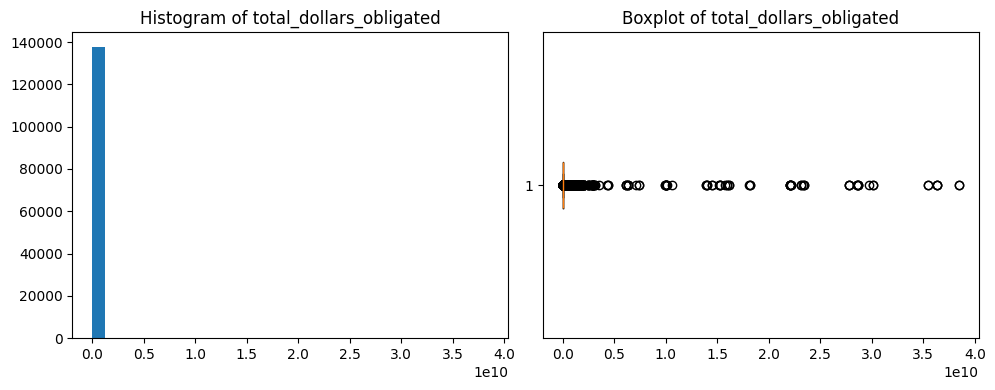

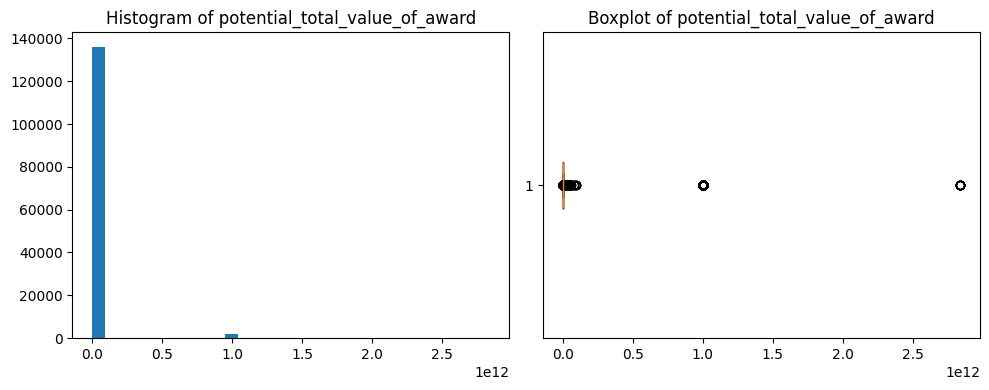

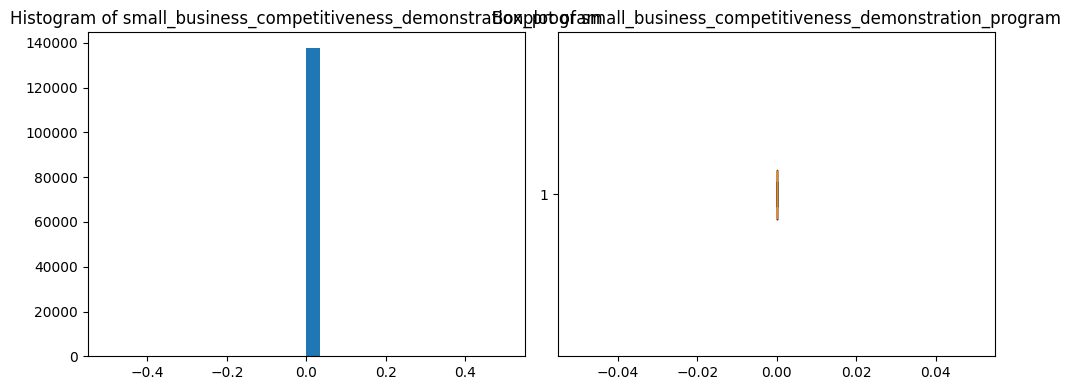

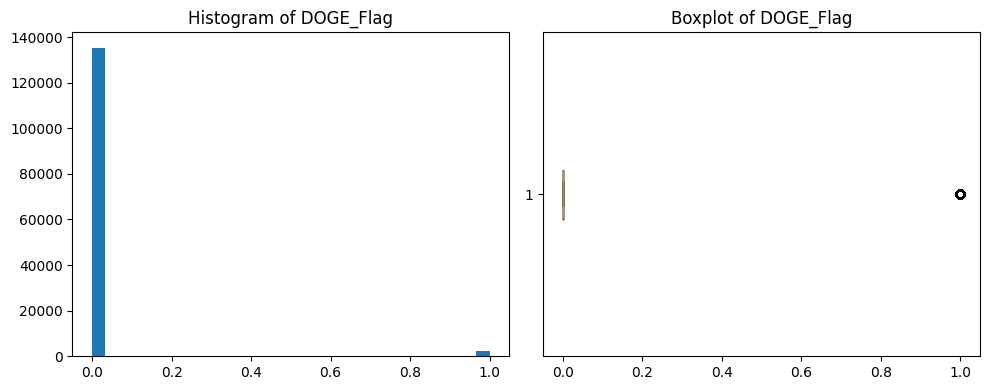

In [ ]:
# ┌────────────────────────────────────────────────────────────────────┐
# │ 2. — Graphical Representations                                    │
# └────────────────────────────────────────────────────────────────────┘
# Histograms + boxplots for numeric features
for col in num_cols:
    fig, axs = plt.subplots(1,2, figsize=(10,4))
    axs[0].hist(df_cleaned[col].dropna(), bins=30)
    axs[0].set_title(f"Histogram of {col}")
    axs[1].boxplot(df_cleaned[col].dropna(), vert=False)
    axs[1].set_title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

# Scatter: cycle time vs total dollars obligated
if {'average_cycle_time','total_dollars_obligated'}.issubset(num_cols):
    plt.figure(figsize=(6,4))
    plt.scatter(df_clean['average_cycle_time'], df_clean['total_dollars_obligated'], alpha=0.5)
    plt.xlabel('Average Cycle Time (days)')
    plt.ylabel('Total Dollars Obligated')
    plt.title('Cycle Time vs Spending')
    plt.show()

In [ ]:
# ┌────────────────────────────────────────────────────────────────────┐
    # │ 3. — Outlier Detection                                           │
    # └────────────────────────────────────────────────────────────────────┘
    # Z‐score method
z_scores = np.abs(zscore(df_cleaned[num_cols].fillna(0)))
outlier_mask = (z_scores > 3).any(axis=1)
print(f"Detected {outlier_mask.sum()} potential outlier rows")

# optional: view a few
display(df_cleaned.loc[outlier_mask].head())

Detected 4424 potential outlier rows


,award_id_piid,total_dollars_obligated,potential_total_value_of_award,period_of_performance_start_date,ordering_period_end_date,awarding_agency_name,awarding_sub_agency_name,funding_agency_name,funding_sub_agency_name,foreign_funding,...,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings,DOGE_Flag
404,75D30124F20209,3651042.26,3651042.26,2024-09-27,Unspecified,Department of Health and Human Services,Centers for Disease Control and Prevention,Department of Health and Human Services,Centers for Disease Control and Prevention,X,...,75D30124F20209,Department of Health and Human Services,ALPHASIX CORPORATION,3651042.26,SEWP LICENSE RENEWAL,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,5/6/2025,0.0,1
409,75D30124P18927,57673.50,181815.64,2024-05-01,Unspecified,Department of Health and Human Services,Centers for Disease Control and Prevention,Department of Health and Human Services,Centers for Disease Control and Prevention,X,...,75D30124P18927,Department of Health and Human Services,STERLING COMPUTERS CORPORATION,181815.64,INGENIUTY PATHWAYS SOFTWARE LICENSE,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,5/6/2025,124142.14,1
845,75N95023F00001,748487.00,748487.00,2023-09-29,Unspecified,Department of Health and Human Services,National Institutes of Health,Department of Health and Human Services,National Institutes of Health,X,...,75N95023F00001,Department of Health and Human Services,"NEW YORK GENOME CENTER, INC.",38000.0,BIOTECHNOLOGY RESEARCH AND DEVELOPMENT: THE BR...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,5/19/2025,14000.0,1
846,75N95023F00001,748487.00,748487.00,2023-09-29,Unspecified,Department of Health and Human Services,National Institutes of Health,Department of Health and Human Services,National Institutes of Health,X,...,75N95023F00001,Department of Health and Human Services,UNIVERSITY OF WASHINGTON,10003.0,RESEARCH AND DEVELOPMENT: BRAIN INITIATIVE CEL...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,5/12/2025,2902.0,1
847,75N95023F00001,748487.00,748487.00,2023-09-29,Unspecified,Department of Health and Human Services,National Institutes of Health,Department of Health and Human Services,National Institutes of Health,X,...,75N95023F00001,Department of Health and Human Services,"BROAD INSTITUTE, INC., THE",5000.0,HEALTH BASIC RESEARCH: BRAIN INITIATIVE CELL A...,TERMINATED,https://www.fpds.gov/ezsearch/jsp/viewLinkCont...,5/9/2025,2000.0,1


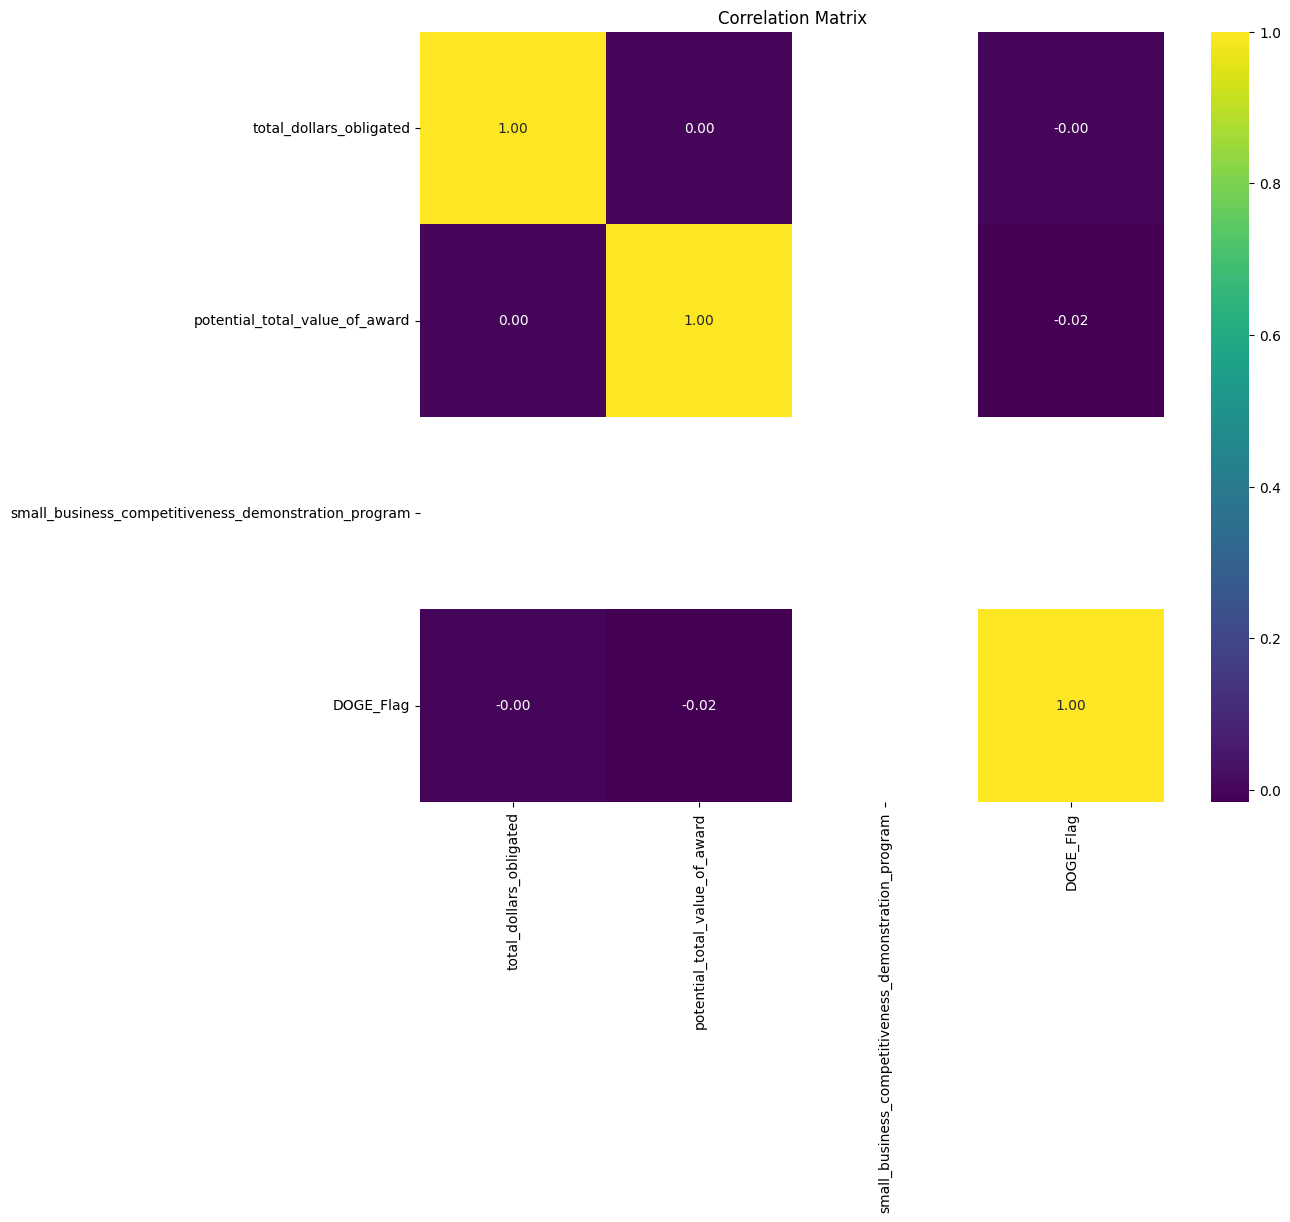

In [ ]:
# ┌────────────────────────────────────────────────────────────────────┐
# │ 4. — Correlation Analysis                                        │
# └────────────────────────────────────────────────────────────────────┘
corr_mat = df_cleaned[num_cols].corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, annot=True, fmt=".2f", cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
# ┌────────────────────────────────────────────────────────────────────┐
# │ 5. — Handling Missing Values                                     │
# └────────────────────────────────────────────────────────────────────┘
# count of original NaNs before fill
print("Missing counts before fill:")
display(df_merged.isnull().sum().sort_values(ascending=False).head(10))

# since we filled with 'Unspecified', check how many remain
print("\n'unspecified' counts (for object columns):")
for col in cat_cols:
    cnt = (df_cleaned[col]=='Unspecified').sum()
    if cnt>0:
        print(f"{col}: {cnt}")

Missing counts before fill:


,0
fpds_link,135307
fpds_status,135306
description,135306
value,135306
deleted_date,135306
piid,135306
agency,135306
vendor,135306
savings,135306
highly_compensated_officer_5_amount,120014



'unspecified' counts (for object columns):
ordering_period_end_date: 118255
cage_code: 103
recipient_country_name: 4
recipient_address_line_1: 4
recipient_city_name: 3
recipient_county_name: 1249
prime_award_transaction_recipient_state_fips_code: 1227
recipient_state_code: 1227
recipient_state_name: 765
recipient_zip_4_code: 382
recipient_phone_number: 1453
naics_code: 11
naics_description: 11
construction_wage_rate_requirements: 4
interagency_contracting_authority: 1
cost_accounting_standards_clause: 25802
performance_based_service_acquisition: 1
multi_year_contract_code: 88361
contingency_humanitarian_or_peacekeeping_operation: 12660
alaskan_native_corporation_owned_firm: 1
american_indian_owned_business: 1
indian_tribe_federally_recognized: 1
native_hawaiian_organization_owned_firm: 1
tribally_owned_firm: 1
veteran_owned_business: 1
service_disabled_veteran_owned_business: 1
woman_owned_business: 1
women_owned_small_business: 1
economically_disadvantaged_women_owned_small_business:

In [ ]:
# ┌────────────────────────────────────────────────────────────────────┐
# │ 6. — Summary Statistics                                          │
# └────────────────────────────────────────────────────────────────────┘
# group‐level summaries, e.g. by agency
if 'awarding_agency_name' in df_cleaned.columns:
    agency_stats = (
        df_cleaned
        .groupby('awarding_agency_name')['total_dollars_obligated']
        .agg(['count','sum','mean','median','std'])
        .sort_values('sum', ascending=False)
    )
    display(agency_stats.head(10))

,count,sum,mean,median,std
awarding_agency_name,,,,,
Department of Energy,983,1.101239e+12,1.120284e+09,541774.190,4.997499e+09
National Aeronautics and Space Administration,1676,3.901386e+11,2.327796e+08,531997.025,1.704798e+09
General Services Administration,94593,5.182377e+10,5.478606e+05,132.070,1.698210e+07
Department of Transportation,2591,3.432870e+10,1.324921e+07,347710.800,1.038090e+08
Department of Health and Human Services,5204,3.026477e+10,5.815674e+06,126968.200,5.564418e+07
Department of Homeland Security,3368,1.821313e+10,5.407700e+06,117750.000,3.111257e+07
Department of Veterans Affairs,6487,1.821016e+10,2.807177e+06,48623.760,3.069890e+07
Department of State,2348,1.340186e+10,5.707777e+06,21857.500,5.103289e+07
Department of the Treasury,4067,1.200271e+10,2.951243e+06,174667.600,1.568644e+07


In [ ]:
# ┌────────────────────────────────────────────────────────────────────┐
# │ 7. — Testing Assumptions                                         │
# └────────────────────────────────────────────────────────────────────┘
# Normality test on a key variable
from scipy import stats # Import stats for shapiro test
if 'average_cycle_time' in num_cols:
    # Make sure there are enough samples for the shapiro test after dropping NaNs
    sample_size = min(5000, df_cleaned['average_cycle_time'].dropna().shape[0])
    if sample_size > 0:
        stat,p = stats.shapiro(df_cleaned['average_cycle_time'].dropna().sample(sample_size))
        print(f"Shapiro-Wilk for cycle time: W={stat:.3f}, p={p:.3f}")
    else:
        print("Not enough data points to perform Shapiro-Wilk test on average_cycle_time.")


# Linearity check: residuals vs fitted for simple regression
# (example: predict spending from cycle time)
import statsmodels.api as sm

# Check if both columns exist before proceeding
if 'average_cycle_time' in df_cleaned.columns and 'total_dollars_obligated' in df_cleaned.columns:
    # Drop rows where either column has NaN for this analysis
    temp_df = df_cleaned[['average_cycle_time', 'total_dollars_obligated']].dropna()

    if not temp_df.empty:
        X = temp_df[['average_cycle_time']]
        y = temp_df['total_dollars_obligated']

        X2 = sm.add_constant(X)
        model = sm.OLS(y, X2).fit()
        resid = model.resid
        plt.figure(figsize=(6,4))
        plt.scatter(model.fittedvalues, resid, alpha=0.5)
        plt.axhline(0, color='black', linestyle='--')
        plt.xlabel('Fitted values')
        plt.ylabel('Residuals')
        plt.title('Residuals vs. Fitted')
        plt.show()
    else:
        print("Not enough data points with both 'average_cycle_time' and 'total_dollars_obligated' to perform OLS regression.")
else:
    print("'average_cycle_time' or 'total_dollars_obligated' column not found in the DataFrame.")

'average_cycle_time' or 'total_dollars_obligated' column not found in the DataFrame.


In [ ]:
# identify object-dtype columns that were filled with 'Unspecified'
unspecified_counts = {
    col: (df_cleaned[col] == 'Unspecified').sum()
    for col in df_cleaned.select_dtypes(include=['object']).columns
    if (df_cleaned[col] == 'Unspecified').any()
}

# sort and display
import pandas as pd
pd.Series(unspecified_counts).sort_values(ascending=False)

,0
fpds_link,135307
deleted_date,135306
savings,135306
fpds_status,135306
value,135306
description,135306
piid,135306
agency,135306
vendor,135306
highly_compensated_officer_5_amount,120014


In [ ]:
# 2. Count 'Unspecified' entries per column
unspecified_counts = (df_cleaned == 'Unspecified') \
    .sum() \
    .sort_values(ascending=False) \
    .reset_index()
unspecified_counts.columns = ['column', 'unspecified_count']

ace_tools.display_dataframe_to_user('Unspecified Value Counts', unspecified_counts)

# 3. Define SAM.gov enrichment function
API_KEY = os.getenv("SAM_API_KEY", "YOUR_API_KEY")

def fetch_award_details(piid):
    """Fetch award details from SAM.gov Awards API given a PIID/award ID."""
    url = (
        "https://api.sam.gov/awards/v2/awards"
        f"?api_key={API_KEY}"
        f"&awardId={piid}"
    )
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data.get('results'):
            return data['results'][0]
    return None

# 4. Identify PIIDs with missing agency names
mask = df_cleaned['awarding_agency_name'] == 'Unspecified'
piids_to_lookup = df_cleaned.loc[mask, 'award_id_piid'].dropna().unique().tolist()

# 5. Fetch and compile enrichment data (limit to first 50 IDs)
enriched = []
for piid in piids_to_lookup[:50]:
    details = fetch_award_details(piid)
    if details:
        enriched.append({
            'award_id_piid': piid,
            'awarding_agency_name_new': details.get('awardingAgencyName'),
            'recipient_name_new': details.get('recipientName'),
            'award_description_new': details.get('description'),
        })

enriched_df = pd.DataFrame(enriched)
ace_tools.display_dataframe_to_user('SAM.gov Enriched Award Details', enriched_df.head())

In [ ]:
#Dataframe info for Department of Government Effeciency Business Case
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137833 entries, 0 to 137832
Columns: 143 entries, award_id_piid to DOGE_Flag
dtypes: float64(2), int64(2), object(139)
memory usage: 150.4+ MB


In [ ]:
#download df_cleaned dtataframe for ChatGPT
df_cleaned.to_csv('df_cleaned.csv', index=False)

In [ ]:
# ┌────────────────────────────────────────────────────────────────────┐
# │ 0. — Imports & Configuration                                      │
# └────────────────────────────────────────────────────────────────────┘
import pandas as pd
import requests
import time
from tqdm import tqdm

API_KEY = '8YqY4EB4WXao00lBlLffNLyO41TNByokHApSdzSO'  # Public API Key
BASE_REG_URL = 'https://api.data.gov/sam/v1/registrations'

# ┌────────────────────────────────────────────────────────────────────┐
# │ 1. — Load your cleaned DataFrame                                  │
# └────────────────────────────────────────────────────────────────────┘
df = pd.read_csv('/content/df_cleaned.csv', low_memory=False)

# ┌────────────────────────────────────────────────────────────────────┐
# │ 2. — Helper: fetch SAM.gov registration by CAGE code              │
# └────────────────────────────────────────────────────────────────────┘
def fetch_sam_by_cage(cage_code):
    params = {
        'qterms': f'cage:{cage_code}',
        'start': 1,
        'length': 1,
        'api_key': API_KEY
    }
    try:
        r = requests.get(BASE_REG_URL, params=params, timeout=10)
        r.raise_for_status()
        recs = r.json().get('results', [])
        if not recs:
            return None
        rec = recs[0]
        addr = rec.get('samAddress', {})
        return {
            'name': rec.get('legalBusinessName'),
            'address1': addr.get('line1'),
            'city': addr.get('city'),
            'state': addr.get('stateOrProvince'),
            'zip': addr.get('zip')
        }
    except Exception as e:
        print(f"Error fetching CAGE {cage_code}: {e}")
        return None

# ┌────────────────────────────────────────────────────────────────────┐
# │ 3. — Enrich loop: cache per-CAGE to minimize API calls            │
# └────────────────────────────────────────────────────────────────────┘
cache = {}
for idx, cage in tqdm(df['cage_code'].items(), total=len(df)):
    if cage == 'Unspecified':
        continue
    if df.at[idx, 'recipient_name'] != 'Unspecified':
        continue

    if cage not in cache:
        cache[cage] = fetch_sam_by_cage(cage)
        time.sleep(0.2)  # throttle ~5 calls/sec

    info = cache[cage]
    if not info:
        continue

    # only overwrite if still 'Unspecified'
    if df.at[idx, 'recipient_name'] == 'Unspecified':
        df.at[idx, 'recipient_name'] = info['name'] or 'Unspecified'
    if df.at[idx, 'recipient_address_line_1'] == 'Unspecified':
        df.at[idx, 'recipient_address_line_1'] = info['address1'] or 'Unspecified'
    if df.at[idx, 'recipient_city_name'] == 'Unspecified':
        df.at[idx, 'recipient_city_name'] = info['city'] or 'Unspecified'
    if df.at[idx, 'recipient_state_name'] == 'Unspecified':
        df.at[idx, 'recipient_state_name'] = info['state'] or 'Unspecified'
    if df.at[idx, 'recipient_zip_4_code'] == 'Unspecified':
        df.at[idx, 'recipient_zip_4_code'] = info['zip'] or 'Unspecified'

# ┌────────────────────────────────────────────────────────────────────┐
# │ 4. — Save enriched DataFrame                                       │
# └────────────────────────────────────────────────────────────────────┘
df.to_csv('/content/df_cleaned_enriched.csv', index=False)
print("Done! Enriched file saved as df_cleaned_enriched.csv")

100%|██████████| 137833/137833 [00:00<00:00, 186997.77it/s]


Done! Enriched file saved as df_cleaned_enriched.csv


In [ ]:
#load df_cleaned_enriched.csv
df_cleaned_enriched = pd.read_csv('/content/df_cleaned_enriched.csv')
df_cleaned_enriched.head(100)

/tmp/ipython-input-27-4019013789.py:2: DtypeWarning: Columns (21,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned_enriched = pd.read_csv('/content/df_cleaned_enriched.csv')


,award_id_piid,total_dollars_obligated,potential_total_value_of_award,period_of_performance_start_date,ordering_period_end_date,awarding_agency_name,awarding_sub_agency_name,funding_agency_name,funding_sub_agency_name,foreign_funding,...,piid,agency,vendor,value,description,fpds_status,fpds_link,deleted_date,savings,DOGE_Flag
0,47QSWA20D0092,0.0,500000.0,2020-08-15,2025-08-14,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
1,47QRAA24D006P,0.0,500000.0,2024-04-17,2029-04-16,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
2,47QTCA20D008C,0.0,4000000.0,2020-04-01,2030-03-31,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
3,47QTCA23D0009,0.0,7600000.0,2022-10-07,2027-10-06,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
4,GS33F004DA,0.0,450000.0,2015-11-03,2025-11-02,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
5,47QTCA19D0063,0.0,6000000.0,2019-02-19,2029-02-18,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
6,GS03F060AA,0.0,708183.0,2013-04-01,2028-03-31,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
7,47QTCA23D00EN,0.0,500000.0,2023-09-26,2028-09-25,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
8,47QRAA24D00CT,0.0,2000000.0,2024-08-22,2029-08-21,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
9,47QSWA22D0036,0.0,500000.0,2022-02-11,2027-02-10,General Services Administration,Federal Acquisition Service,General Services Administration,Federal Acquisition Service,X,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,0
